In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

**Проверяем data types**

In [92]:
df = pd.read_csv('train.csv')
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [93]:
#Заменяем для удобности
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
df['Sex'] = df['Sex'].astype(int)

#Все пропуски Nan заменяем на 0
df.fillna(0, inplace=True)
print(f"До удаления (Проверяем и заменяем type) {df.dtypes}")

df = df.drop(columns= df.select_dtypes(include='object').columns)
print(f"После удаления столбцов {df.dtypes}")

До удаления (Проверяем и заменяем type) PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
После удаления столбцов PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object


In [94]:
#Перевели данные в NumPy для обучения модели
selected_Ytrain = df.iloc[:, 1]
selected_Xtrain = df.iloc[:, 2:]

y_train = selected_Ytrain.to_numpy()
print(f"y_train = {y_train}\n")
x_train = selected_Xtrain.to_numpy()
print(x_train)

y_train = [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 

**Выведем зависимость**

Text(0, 0.5, 'y')

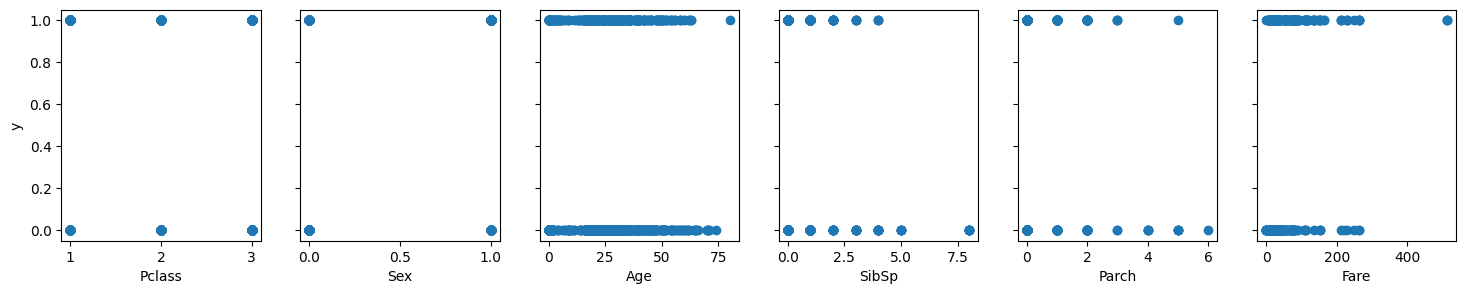

In [95]:
names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

_, N = x_train.shape

fig, ax = plt.subplots(1, N, figsize = (18, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(names[i])
ax[0].set_ylabel("y")

In [96]:
#Нормализовали значения x_train
def z_score_normalized(X):
  mu = np.mean(X, axis = 0)
  sigma = np.std(X, axis = 0)

  X_norm = (X-mu)/sigma

  return X_norm

print(z_score_normalized(x_train))

[[ 0.82737724 -0.73769513 -0.10231279  0.43279337 -0.47367361 -0.50244517]
 [-1.56610693  1.35557354  0.80749164  0.43279337 -0.47367361  0.78684529]
 [ 0.82737724  1.35557354  0.12513832 -0.4745452  -0.47367361 -0.48885426]
 ...
 [ 0.82737724  1.35557354 -1.35329389  0.43279337  2.00893337 -0.17626324]
 [-1.56610693 -0.73769513  0.12513832 -0.4745452  -0.47367361 -0.04438104]
 [ 0.82737724 -0.73769513  0.46631498 -0.4745452  -0.47367361 -0.49237783]]


**Модель логистической регрессии**

In [97]:
def cost_func(x, y, w, b):

  m, n = x.shape
  cost = 0.0

  for i in range(n):
    f_wb = 1/(1+np.exp(-np.dot(x[i],w) + b))
    cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)

  total_cost = cost / m

  return total_cost

def compute_gradient(x, y, w, b):

  m, n = x.shape

  dj_dw = np.zeros((n, ))
  dj_db = 0.

  for i in range(m):
    f_wb = 1/(1+np.exp(-np.dot(x[i],w) + b))
    err = f_wb - y[i]
    for j in range(n):
      dj_dw[j] += err*x[i, j]
    dj_db += err
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

def gradient_decent(x, y, w_in, b_in, alfa, num_iterations):

  J_history = []
  w = copy.deepcopy(w_in)
  b = b_in

  for i in range(num_iterations):

    dj_dw, dj_db = compute_gradient(x, y, w, b)

    w = w - alfa*dj_dw
    b = b - alfa*dj_db

    if i<10000:
      J_history.append(cost_func(x, y, w, b))

    if i%1000 == 0:
      print(f'Iteration: {i} Cost: {J_history[-1]}')

  return w, b, J_history

In [98]:
alfa = 0.01
w_tmp = np.zeros_like(x_train[0])
b_tmp = 0.0
iters = 10000

w_out, b_out, _ = gradient_decent(x_train, y_train, w_tmp, b_tmp, alfa, iters)
print(f'w = {w_out} \nb = {b_out}')

Iteration: 0 Cost: 0.004019416340497617
Iteration: 1000 Cost: 0.0018019479615409755
Iteration: 2000 Cost: 0.0013573060933137944
Iteration: 3000 Cost: 0.001087883107244814
Iteration: 4000 Cost: 0.0008837386656362596
Iteration: 5000 Cost: 0.0007806017516612379
Iteration: 6000 Cost: 0.0007181901098479929
Iteration: 7000 Cost: 0.0006860230029448191
Iteration: 8000 Cost: 0.0006515901702212802
Iteration: 9000 Cost: 0.0006270436911278106
w = [-8.05353567e-01  3.58129961e+00 -5.16344091e-02 -6.80901644e-01
 -1.83396460e-01  2.54755030e-03] 
b = -0.024326879219309615


Text(0, 0.5, 'y')

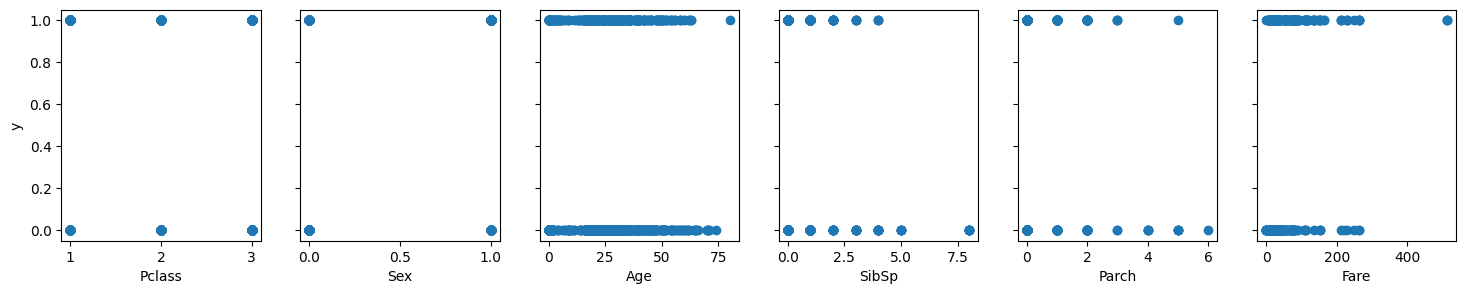

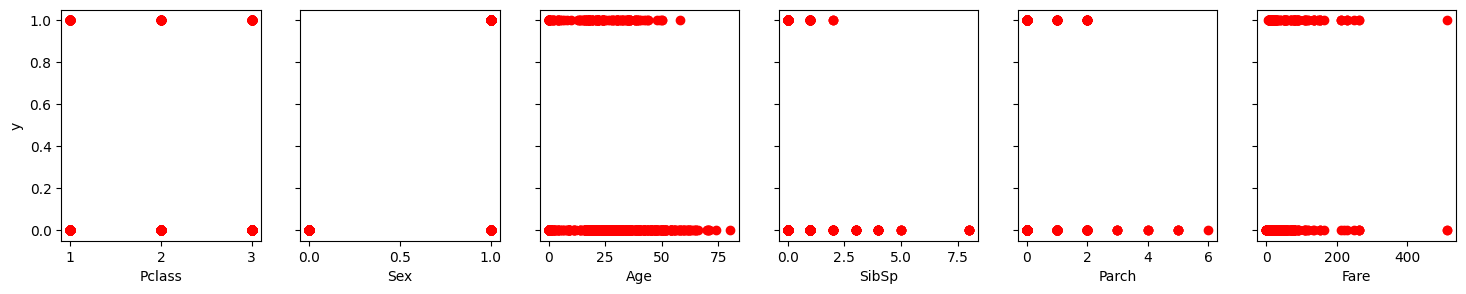

In [99]:
predict = np.zeros_like(x_train[:, 0])

'''for i in range(len(predict)):
  predict[i] = 1 / (1 + np.exp(-np.dot(x_train[i], w_out) - b_out))'''

for i in range(len(predict)):
  f_wb =1 / (1 + np.exp(-np.dot(x_train[i], w_out) - b_out))
  if f_wb>=0.5:
    predict[i] = 1
  else:
    predict[i] = 0

fig, ax = plt.subplots(1, N, figsize = (18, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(names[i])
ax[0].set_ylabel("y")

fig, ax = plt.subplots(1, N, figsize = (18, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],predict, c= 'r')
    ax[i].set_xlabel(names[i])
ax[0].set_ylabel("y")

In [117]:
df_test = pd.read_csv("test.csv")
print(df_test.dtypes)

df_test['Sex'] = df_test['Sex'].map({'female': 1, 'male': 0})
df_test['Sex'] = df_test['Sex'].astype(int)

df_test = df_test.drop(columns=df_test.select_dtypes('object').columns)
df_test.fillna(0, inplace=True)

print(df_test.dtypes)


selected_Xtest = df_test.iloc[:, 1:]


x_test = selected_Xtest.to_numpy()
print(x_test)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object
[[ 3.      0.     34.5     0.      0.      7.8292]
 [ 3.      1.     47.      1.      0.      7.    ]
 [ 2.      0.     62.      0.      0.      9.6875]
 ...
 [ 3.      0.     38.5     0.      0.      7.25  ]
 [ 3.      0.      0.      0.      0.      8.05  ]
 [ 3.      0.      0.      1.      1.     22.3583]]


In [126]:
#Предикт
def predict_test(x, w, b):
  m, n = x.shape
  p = np.zeros(m)

  for i in range(m):
    f_wb = 1 / (1 + np.exp(-np.dot(x[i], w) - b))
    p[i] = f_wb >=0.5

  return p

#выводим predict
p = predict_test(x_test, w_out, b_out)
#print(f"Predicts: {p}")

#Делаем массив с ID
selected_PassengerId = df_test.iloc[:, 0]

PassengerId = selected_PassengerId.to_numpy()

#print(f"ID: {PassengerId}")

# Создаём DataFrame
grouped_df = pd.DataFrame({
    'PassengerId': PassengerId,
    'Survived': p.astype(int)  # на всякий случай приводим к int
})

print(grouped_df)
grouped_df.to_csv('grouped_test.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
